In [26]:
import warnings
warnings.filterwarnings('ignore')

## Методы обучения без учителя. Кластеризация


Рассмотрим синтетический пример групп точек. Зрительная система человека легко выделяет группы точек, расположенных близко друг к другу.

Как реализовать данный алгоритм для решения этой задачи машиной?

Для чего это нужно? Как уже говорилось ранее (лекция 5), каждый объект в конечном итоге представляется набором числовых свойств, представляющих собой точку в пространстве признаков. Очевидно, похожие объекты будут находиться рядом друг с другом ввиду близости свойств, формируя компактные множества (гипотеза компактности). 

Данная задача актуальна в случае, когда не задана принадлежность объектов каким-либо классам, либо решается задача анализа свойств объектов, в которой информация о принадлежности классам не требуется. 

Решение задачи выделения таких групп объектов - **кластеров** - позволяет находить и исследовать их общие свойства, формировать какие-либо предположения и гипотезы.  


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap

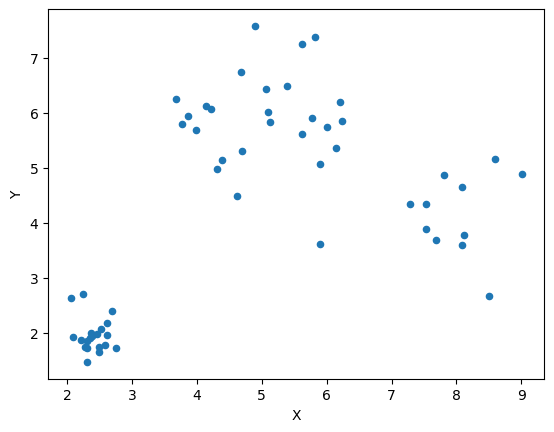

In [15]:
#первая кучка вокруг точки (2.5, 2)
x1 = np.random.normal(2.5, 0.3, 20)
y1 = np.random.normal(2.0, 0.3, 20)
dat = pd.DataFrame({"X": x1, "Y": y1, "class": 1})

#вторая кучка вокруг точки (5, 6)
x2 = np.random.normal(5.0, 1.0, 25)
y2 = np.random.normal(6.0, 1.0, 25)
add = pd.DataFrame({"X": x2, "Y": y2, "class": 2})
dat = pd.concat([dat, add], ignore_index = True)

#третья кучка вокруг точки (8, 4)
x3 = np.random.normal(8.0, .7, 12)
y3 = np.random.normal(4.0, .6, 12)
add = pd.DataFrame({"X": x3, "Y": y3, "class": 3})
dat = pd.concat([dat, add], ignore_index = True)

#dat.plot.scatter(x="X", y="Y", c="class", cmap = ListedColormap(["red", "green","blue"]))
dat.plot.scatter(x="X", y="Y")
plt.show()


**Кластеризация** - это задача машинного обучения, которая заключается в разделении набора данных на группы (кластеры) объектов, которые имеют схожие характеристики или свойства. Алгоритмы кластеризации предлагают различные методы для выполнения этой задачи. Наиболее распространенные из них:

* K-средних (K-means): Это один из самых популярных алгоритмов кластеризации. Он разбивает набор данных на K кластеров, где K - заданное число. Алгоритм начинает с инициализации K центроидов (представляющих центры кластеров) случайным образом. Затем он выполняет итеративный процесс, перемещая центроиды и перераспределяя объекты между кластерами до сходимости.


* DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Этот алгоритм основан на плотности данных. Он определяет кластеры, исходя из плотности объектов в пространстве. Алгоритм идентифицирует основные объекты (точки с высокой плотностью) и расширяет кластеры от них, исключая шумовые объекты (точки с низкой плотностью).


* Иерархическая кластеризация: Этот алгоритм строит иерархию кластеров, представленную в виде дерева (дендрограммы). Он может быть агломеративным или дивизивным. Агломеративная иерархическая кластеризация начинается с каждого объекта в отдельном кластере и объединяет близкие кластеры, пока не будет получено окончательное разбиение. Дивизивная иерархическая кластеризация начинается с одного кластера, который разделяется на более мелкие кластеры до достижения желаемого числа.


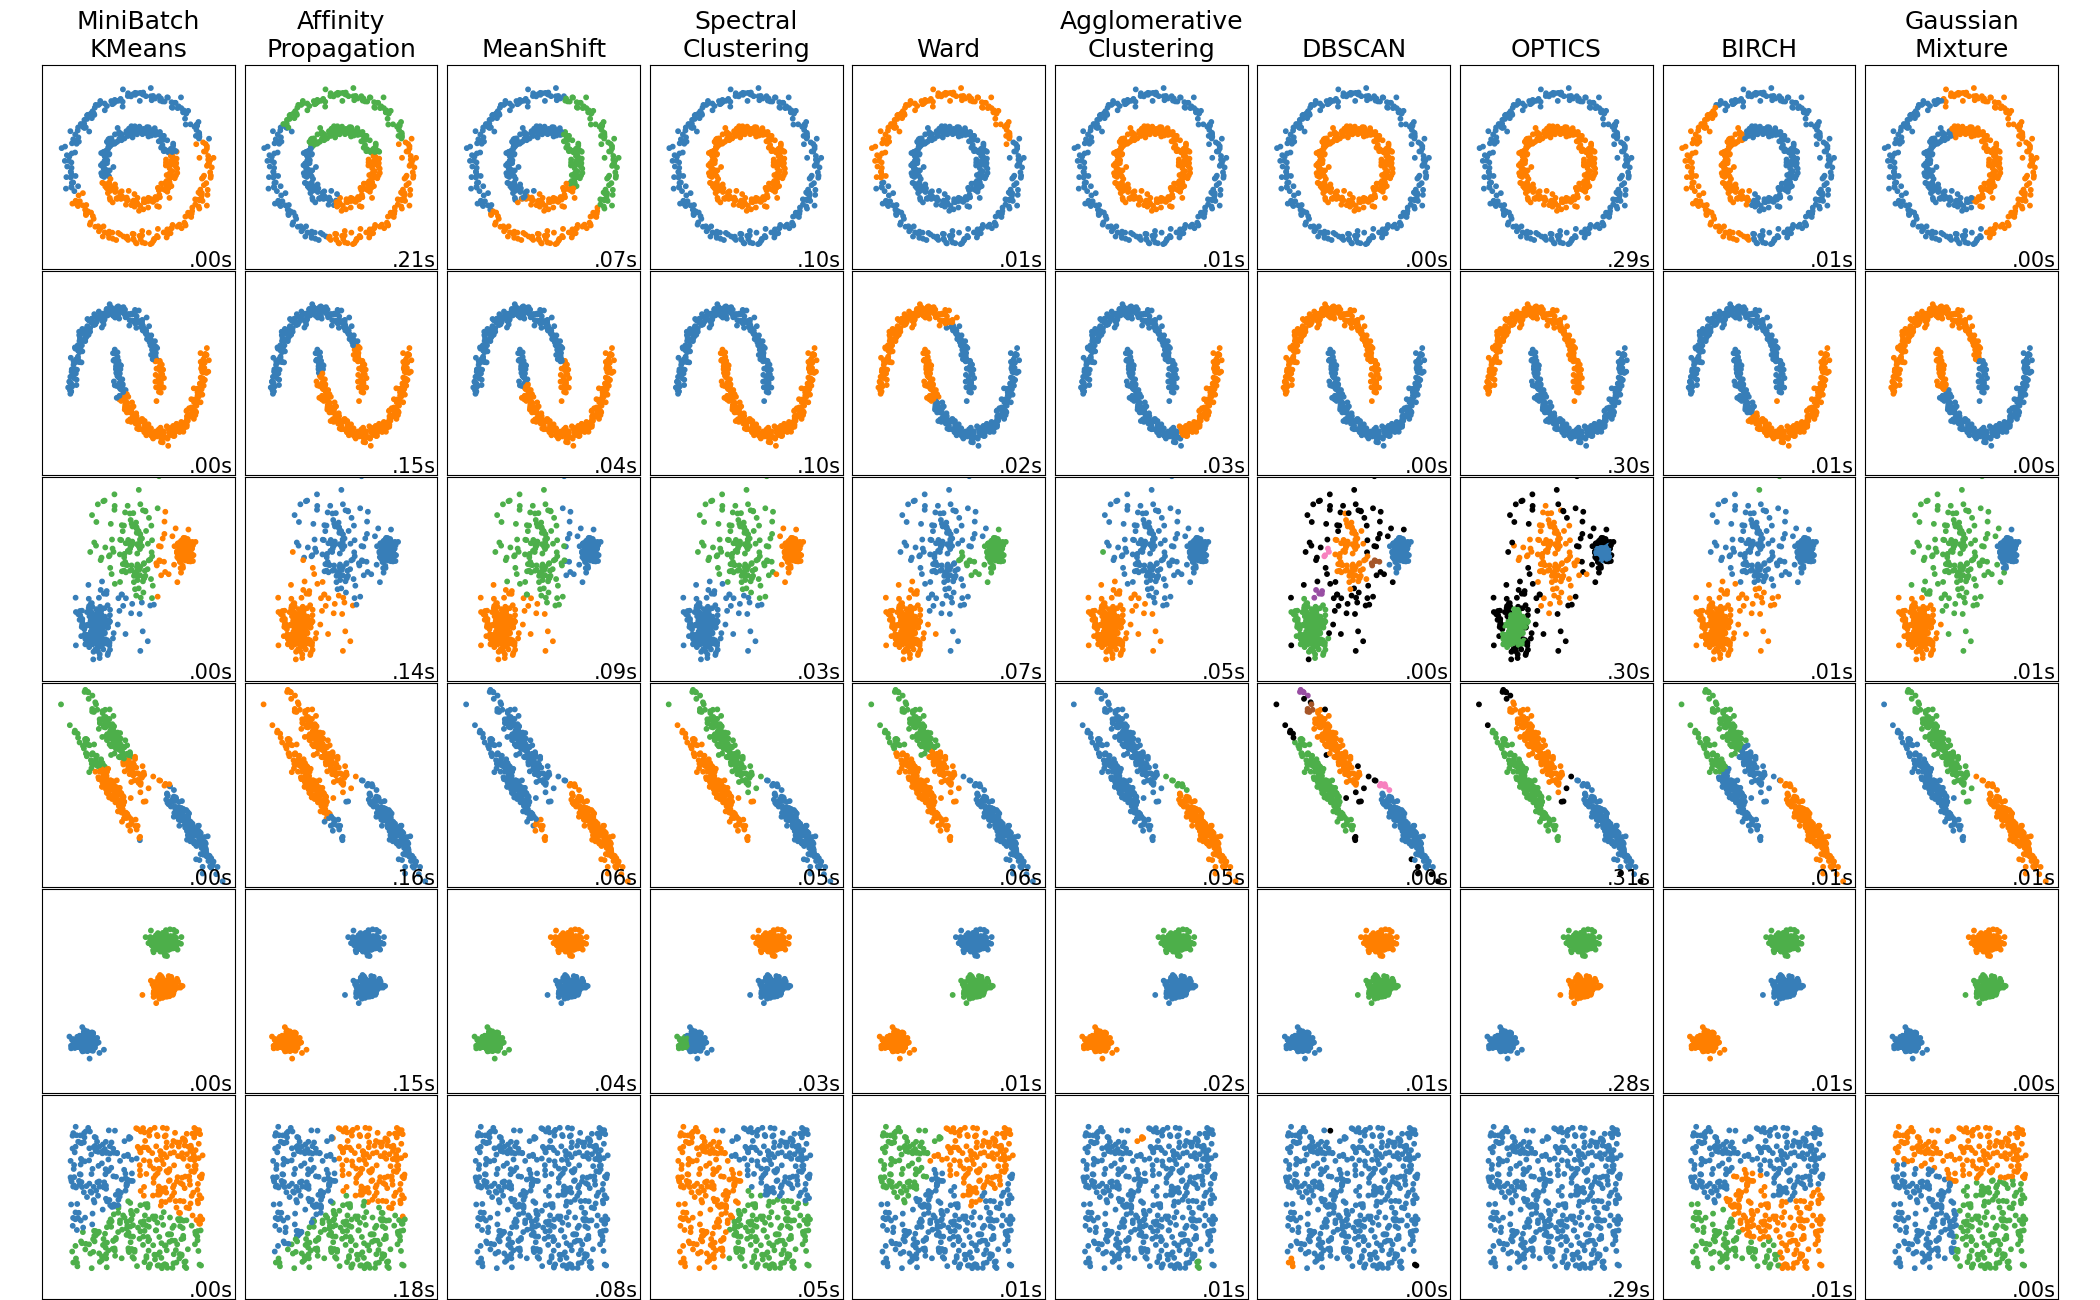

Картинка взята с https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

Для наглядности и простоты интерпретации работы методом используем известный набор данных с ирисами (наличие классификации позволяет сравнить результат работы машинного выдаления групп по их свйствам с естественной)

In [17]:
from sklearn.datasets import load_iris

data = load_iris()

### Метод К средних (K-Means)

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X = data.data

# Создаем объект KMeans с количеством кластеров равным 3
kmeans = KMeans( n_clusters = 3 )

# Производим кластеризацию данных
kmeans.fit( X )

# метки кластеров для каждого объекта
labels = kmeans.labels_

# координаты центроидов
centroids = kmeans.cluster_centers_

print("Метки кластеров:")
print(labels)
print("ФАктические метки классов:")
print(data.target)

print("Координаты центроидов:")
print(centroids)

print(f"Точность: {accuracy_score(data.target, labels)}" )

Метки кластеров:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
ФАктические метки классов:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Координаты центроидов:
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Точность: 0.09333333333333334


В задаче с ирисами Фишера было известно количество классов, что позволило сравнить качество машинной "классификации". В общем случае, количество кластеров a-priori неизвестно и сравнивать качество такой классификации не с чем.  

Как выбрать оптимальное количество кластеров?

### Метод локтя (Elbow)

Метод локтя (Elbow method) - это графический метод выбора оптимального количества кластеров при применении алгоритмов кластеризации. Этот метод основан на оценке суммы квадратов расстояний от каждого объекта до центроидов кластеров.


При оценке качества кластеризации используются различные метрики, которые позволяют оценить сходство между кластерами и их компактность. Вот некоторые распространенные метрики кластеризации:

* Индекс силуэта (Silhouette Score): Метрика, которая оценивает сходство объектов внутри своего кластера и различие между кластерами. Значение индекса силуэта находится в диапазоне от -1 до 1, где высокое значение указывает на хорошую кластеризацию.

* Коэффициент Дэвиcа-Болдуина (Davies-Bouldin Index): Метрика, которая оценивает сходство и различие между кластерами, учитывая их компактность и разделение. Низкое значение коэффициента Дэвиcа-Болдуина указывает на хорошую кластеризацию.

* Показатель согласования Rand (Rand Index): Метрика, которая оценивает сходство между исходными метками и метками, полученными после кластеризации. Значение показателя Rand находится в диапазоне от 0 до 1, где высокое значение указывает на хорошую кластеризацию.

#### Оценка метрик кластеризации:

В Python существует несколько библиотек, которые предоставляют средства для оценки метрик кластеризации. Некоторые из наиболее популярных библиотек включают:

* scikit-learn: Библиотека scikit-learn предоставляет множество метрик кластеризации в модуле **sklearn.metrics**. Некоторые из них включают **silhouette_score**, **davies_bouldin_score**, **adjusted_rand_score**, и другие.

* scipy: Библиотека scipy также предлагает некоторые метрики кластеризации в модуле **scipy.cluster.hierarchy**. Например, функция **cophenet** может использоваться для оценки качества иерархической кластеризации.

In [31]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score

# X - данные
# labels - метки кластеров
silhouette_avg = silhouette_score(X, labels)
print("Средний индекс силуэта (от -1 (плохо) до 1(хорошо) ):", silhouette_avg)

# X - данные
# labels - метки кластеров
db_index = davies_bouldin_score(X, labels)
print("Коэффициент Дэвиcа-Болдуина (от 0 до 1. Чем меньше, тем лучше):", db_index)


Средний индекс силуэта (от -1 (плохо) до 1(хорошо) ): 0.5528190123564095
Коэффициент Дэвиcа-Болдуина (от 0 до 1. Чем меньше, тем лучше): 0.6619715465007484


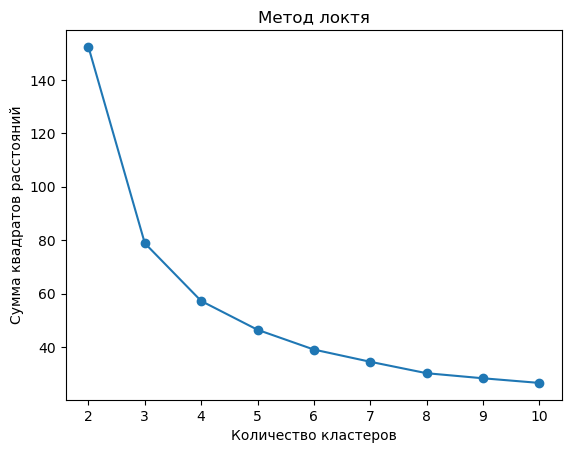

In [32]:
# список для сохранения значений инерции
inertia_values = []

# Перебираем разное количество кластеров
for k in range(2, 11):
    # объект KMeans с текущим количеством кластеров
    kmeans = KMeans( n_clusters = k, random_state = 42)
    kmeans.fit( X )
    # Сохраняем значение инерции - мерой компактности кластеров. 
    # Он вычисляется как сумма квадратов расстояний между каждым объектом данных и центроидом  
    inertia_values.append( kmeans.inertia_ )

plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод локтя')
plt.show()

DBSCAN

In [43]:
from sklearn.cluster import DBSCAN

# Создаем объект DBSCAN с параметрами: радиус epsilon и минимальное количество точек в окрестности min_samples
dbscan = DBSCAN(eps = 1.0, min_samples = 5 )

# Производим кластеризацию данных
dbscan.fit(X)

# метки кластеров для каждого объекта (-1 означает шумовые точки)
labels = dbscan.labels_

# Получаем количество кластеров (-1 означает шумовые точки)
n_clusters = len( set(labels)) - (1 if -1 in labels else 0)

# Выводим результаты
print("Метки кластеров:")
print(labels)
print("Количество кластеров:", n_clusters)
print("Средний индекс силуэта:", silhouette_score(X, labels))
print("Коэффициент Дэвиcа-Болдуина:", davies_bouldin_score(X, labels))

Метки кластеров:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Количество кластеров: 2
Средний индекс силуэта: 0.6867350732769777
Коэффициент Дэвиcа-Болдуина (от 0 до 1. Чем меньше, тем лучше): 0.38275284210068705


### Иерархическая кластеризация:

#### Агломеративная:

In [45]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Создаем объект AgglomerativeClustering с количеством кластеров равным 3
agg_clustering = AgglomerativeClustering(n_clusters = 3)

# Производим кластеризацию данных
agg_clustering.fit(X)

# Получаем метки кластеров для каждого объекта
labels = agg_clustering.labels_

# Выводим результаты
print("Метки кластеров:")
print(labels)
print("Средний индекс силуэта:", silhouette_score(X, labels))
print("Коэффициент Дэвиcа-Болдуина:", davies_bouldin_score(X, labels))

Метки кластеров:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Средний индекс силуэта: 0.5543236611296419
Коэффициент Дэвиcа-Болдуина: 0.656256454064201


#### Визуализация дендрограммы:

C помощью функций **linkage** и **dendrogram** из библиотеки **scipy**

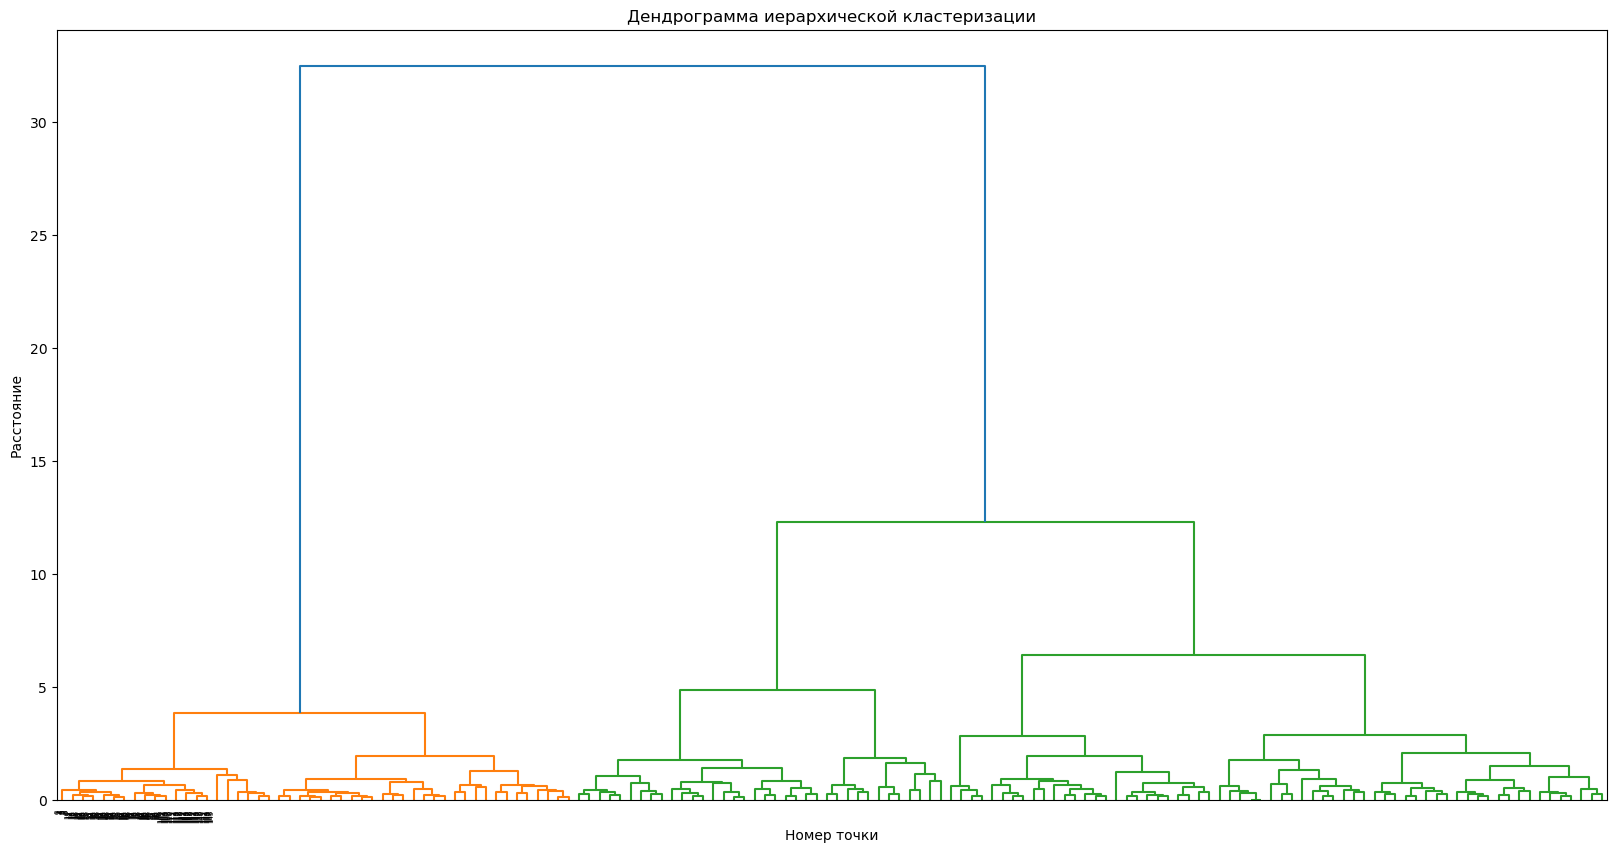

In [48]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Выполняем иерархическую кластеризацию
Z = hierarchy.linkage(X, method='ward')

# Визуализируем дендрограмму
plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(Z)

# Добавляем метки кластеров к точкам на оси X
labels = range(len(X))
plt.xticks(range(len(X)), labels)

# Добавляем подписи осей и заголовок
plt.xlabel('Номер точки')
plt.ylabel('Расстояние')
plt.title('Дендрограмма иерархической кластеризации')

# Показываем график
plt.show()